# Frecuencia de comas en *Dracula* de Bram Stocker
## Alberto Benavides

Un análisis estadístico básico de un libro consiste en analizar la frecuencia con que aparecen las palabras con que está escrito. Una guía bastante completa para lograrlo en R puede consultarse [aquí](https://compsocialscience.github.io/summer-institute/2018/materials/day3-text-analysis/basic-text-analysis/rmarkdown/Basic_Text_Analysis_in_R.html).

El libro de *Dracula* se encuentra disponible de manera gratuita en el sitio de [Project Gutemberg](https://www.gutenberg.org/) que alberga libros cuya propiedad intelectual ha caducado y, por lo tanto, se trata de obras que forman parte del dominio público. Se puede acceder a los textos planos de estas obras mediante la librería [`gutembergr`](https://cran.r-project.org/web/packages/gutenbergr/vignettes/intro.html) de R y la descomposición en palabras de la obra se facilita con el uso de [`tidytext`](https://cran.r-project.org/web/packages/tidytext/index.html) que, a su vez, utiliza para su funcionamiento la librería [`dplyr`](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8).

In [1]:
if (!require('gutenbergr')) install.packages('gutenbergr'); library('gutenbergr')
if (!require('tidytext')) install.packages('tidytext'); library('tidytext')
if (!require('dplyr')) install.packages('dplyr'); library('dplyr')
if (!require('igraph')) install.packages('igraph'); library('igraph')
if (!require('corpus')) install.packages('corpus'); library('corpus')
if (!require('stringr')) install.packages('stringr'); library('stringr')

Loading required package: gutenbergr

Loading required package: tidytext

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Loading required package: corpus

Loading required package: stringr



In [2]:
# https://github.com/IRkernel/IRkernel/issues/470#issuecomment-296786927
# Muestra más filas y columnas en Jupyter R
options(repr.matrix.max.rows=10, repr.matrix.max.cols=20)

In [3]:
dra = gutenberg_download(c(345))
fra = gutenberg_download(c(42324))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



In [4]:
tail(dra, 100)

gutenberg_id,text
<int>,<chr>
345,"authentic document; nothing but a mass of typewriting, except the later"
345,"note-books of Mina and Seward and myself, and Van Helsing's memorandum."
345,"We could hardly ask any one, even did we wish to, to accept these as"
345,"proofs of so wild a story. Van Helsing summed it all up as he said, with"
345,our boy on his knee:--
...,...
345,279}
345,
345,Translyvania=> Transylvania {pg 294}


Hay una sección de erratas y otros datos que se escapan del contenido del libro, por lo que se procederá a eliminarlos, lo que sucede a partir de la línea que contienen "THE END".

In [5]:
t = grep("THE END", dra$text) # línea donde se termina el libro

Tampoco interesa el Índice.

In [6]:
dra = dra[162:t, ] # 161 inicia el capítulo 1
head(dra, 3)
tail(dra, 3)

gutenberg_id,text
<int>,<chr>
345,CHAPTER I
345,
345,JONATHAN HARKER'S JOURNAL


gutenberg_id,text
<int>,<chr>
345,JONATHAN HARKER.
345,
345,THE END


Se eliminan las líneas vacías y los `_`

In [7]:
dra = dra[dra$text != "",]

dra = lapply(dra, gsub, pattern="_", replacement="")
dra = as.data.frame(dra)
#dra

In [8]:
tail(fra, 100)

gutenberg_id,text
<int>,<chr>
42324,feelings of happiness and affection with which my whole being
42324,"overflowed, that I wished to be participated. But now, that virtue has"
42324,"become to me a shadow, and that happiness and affection are turned into"
42324,"bitter and loathing despair, in what should I seek for sympathy? I am"
42324,"content to suffer alone, while my sufferings shall endure: when I die, I"
...,...
42324,New-Street-Square.
42324,
42324,[Transcriber's Note: Possible printer errors corrected:


In [9]:
t = grep("THE END.", fra$text) # línea donde se termina el libro
t

[1] 7622

In [10]:
fra = fra[301:t,]
head(fra, 3)
tail(fra, 3)

gutenberg_id,text
<int>,<chr>
42324,FRANKENSTEIN;
42324,
42324,"OR,"


gutenberg_id,text
<int>,<chr>
42324,
42324,
42324,THE END.


In [11]:
fra = fra[fra$text != "",]

fra = lapply(fra, gsub, pattern="_", replacement="")
fra = as.data.frame(fra)
fra

gutenberg_id,text
<chr>,<chr>
42324,FRANKENSTEIN;
42324,"OR,"
42324,THE MODERN PROMETHEUS.
42324,LETTER I.
42324,"To Mrs. Saville, England."
...,...
42324,"Farewell."""
42324,"He sprung from the cabin-window, as he said this, upon the ice-raft"
42324,"which lay close to the vessel. He was soon borne away by the waves, and"


Se convierte en una sola cadena de texto.

In [12]:
# https://pvanb.wordpress.com/2011/03/02/combining-text-from-data-frame-in-one-text-string-in-r/
s_dra = paste(dra$text, collapse = " ")
#s_dra

s_fra = paste(fra$text, collapse = " ")
#s_fra

Ahora se procede a extraer los caracteres usados y las palabras completas.

In [13]:
# https://stackoverflow.com/a/47224409/3113008
dra_oraciones = text_split(s_dra, "sentences")
dra_oraciones

fra_oraciones = text_split(s_fra, "sentences")
fra_oraciones

parent,index,text
<fct>,<int>,<crps_txt>
1,1,CHAPTER I JONATHAN HARKER'S JOURNAL (Kept in shorthand.)
1,2,3 May.
1,3,"Bistritz.--Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early …"
1,4,"Buda-Pesth seems a wonderful place, from the glimpse which I got of it from…"
1,5,"I feared to go very far from the station, as we had arrived late and would …"
...,...,...
1,8578,"Van Helsing summed it all up as he said, with our boy on his knee:-- ""We wa…"
1,8579,This boy will some day know what a brave and gallant woman his mother is.
1,8580,Already he knows her sweetness and loving care; later on he will understand…


parent,index,text
<fct>,<int>,<crps_txt>
1,1,"FRANKENSTEIN; OR, THE MODERN PROMETHEUS."
1,2,"LETTER I. To Mrs. Saville, England."
1,3,"St. Petersburgh, Dec. 11th, 17--."
1,4,You will rejoice to hear that no disaster has accompanied the commencement …
1,5,I arrived here yesterday; and my first task is to assure my dear sister of …
...,...,...
1,3325,"My spirit will sleep in peace; or if it thinks, it will not surely think th…"
1,3326,"Farewell."""
1,3327,"He sprung from the cabin-window, as he said this, upon the ice-raft which l…"


Se pueden extraer algunos dartos interesantes, a partir de las oraciones. Cantidad de palabras por oración, cantidad de `,` y `;` por oración y riqueza de vocabulario, por ejemplo (ver http://www.aicbt.com/authorship-attribution/). Para ello primero se convierte en `dataframe`.

In [14]:
# https://stackoverflow.com/a/33193705/3113008
dra_oraciones = data.frame(sapply(dra_oraciones, as.character), stringsAsFactors = FALSE)
dra_oraciones

fra_oraciones = data.frame(sapply(fra_oraciones, as.character), stringsAsFactors = FALSE)
fra_oraciones

parent,index,text
<chr>,<chr>,<chr>
1,1,CHAPTER I JONATHAN HARKER'S JOURNAL (Kept in shorthand.)
1,2,3 May.
1,3,"Bistritz.--Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early next morning; should have arrived at 6:46, but train was an hour late."
1,4,"Buda-Pesth seems a wonderful place, from the glimpse which I got of it from the train and the little I could walk through the streets."
1,5,"I feared to go very far from the station, as we had arrived late and would start as near the correct time as possible."
...,...,...
1,8578,"Van Helsing summed it all up as he said, with our boy on his knee:-- ""We want no proofs; we ask none to believe us!"
1,8579,This boy will some day know what a brave and gallant woman his mother is.
1,8580,"Already he knows her sweetness and loving care; later on he will understand how some men so loved her, that they did dare much for her sake."""


parent,index,text
<chr>,<chr>,<chr>
1,1,"FRANKENSTEIN; OR, THE MODERN PROMETHEUS."
1,2,"LETTER I. To Mrs. Saville, England."
1,3,"St. Petersburgh, Dec. 11th, 17--."
1,4,You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.
1,5,"I arrived here yesterday; and my first task is to assure my dear sister of my welfare, and increasing confidence in the success of my undertaking."
...,...,...
1,3325,"My spirit will sleep in peace; or if it thinks, it will not surely think thus."
1,3326,"Farewell."""
1,3327,"He sprung from the cabin-window, as he said this, upon the ice-raft which lay close to the vessel."


Ahora se cuentan las palabras por oración.

In [15]:
# https://stackoverflow.com/a/11516135/3113008
dra_oraciones$n_palabras = sapply(strsplit(dra_oraciones$text, " "), length)
# https://stackoverflow.com/a/9671466/3113008
dra_oraciones$n_comas = sapply(dra_oraciones$text, function(x) str_count(x, ','))
dra_oraciones$n_pcomas = sapply(dra_oraciones$text, function(x) str_count(x, ';'))
dra_oraciones
                                
fra_oraciones$n_palabras = sapply(strsplit(fra_oraciones$text, " "), length)
fra_oraciones$n_comas = sapply(fra_oraciones$text, function(x) str_count(x, ','))
fra_oraciones$n_pcomas = sapply(fra_oraciones$text, function(x) str_count(x, ';'))
fra_oraciones

parent,index,text,n_palabras,n_comas,n_pcomas
<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,CHAPTER I JONATHAN HARKER'S JOURNAL (Kept in shorthand.),8,0,0
1,2,3 May.,2,0,0
1,3,"Bistritz.--Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early next morning; should have arrived at 6:46, but train was an hour late.",26,3,1
1,4,"Buda-Pesth seems a wonderful place, from the glimpse which I got of it from the train and the little I could walk through the streets.",25,1,0
1,5,"I feared to go very far from the station, as we had arrived late and would start as near the correct time as possible.",24,1,0
...,...,...,...,...,...
1,8578,"Van Helsing summed it all up as he said, with our boy on his knee:-- ""We want no proofs; we ask none to believe us!",25,1,1
1,8579,This boy will some day know what a brave and gallant woman his mother is.,15,0,0
1,8580,"Already he knows her sweetness and loving care; later on he will understand how some men so loved her, that they did dare much for her sake.""",27,1,1


parent,index,text,n_palabras,n_comas,n_pcomas
<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,"FRANKENSTEIN; OR, THE MODERN PROMETHEUS.",5,1,1
1,2,"LETTER I. To Mrs. Saville, England.",6,1,0
1,3,"St. Petersburgh, Dec. 11th, 17--.",5,2,0
1,4,You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.,23,0,0
1,5,"I arrived here yesterday; and my first task is to assure my dear sister of my welfare, and increasing confidence in the success of my undertaking.",26,1,1
...,...,...,...,...,...
1,3325,"My spirit will sleep in peace; or if it thinks, it will not surely think thus.",16,1,1
1,3326,"Farewell.""",1,0,0
1,3327,"He sprung from the cabin-window, as he said this, upon the ice-raft which lay close to the vessel.",18,2,0


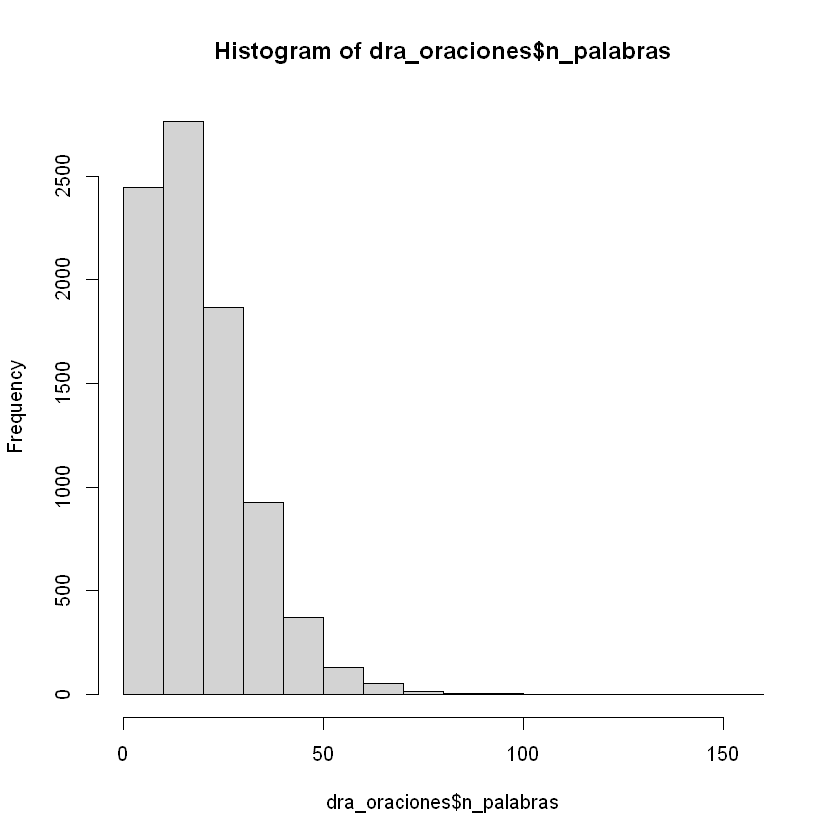

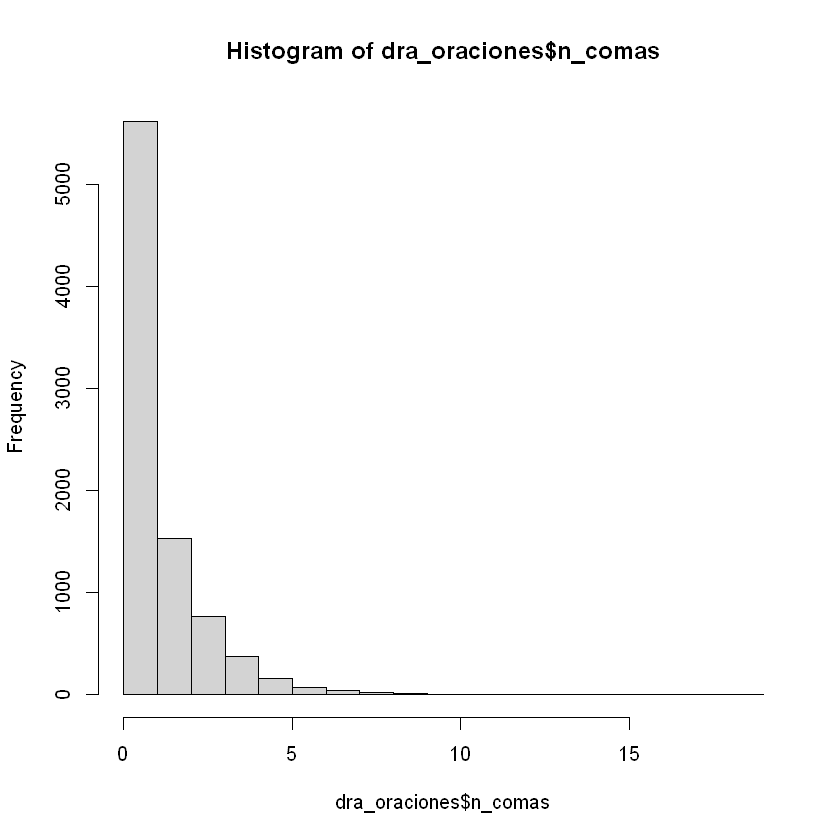

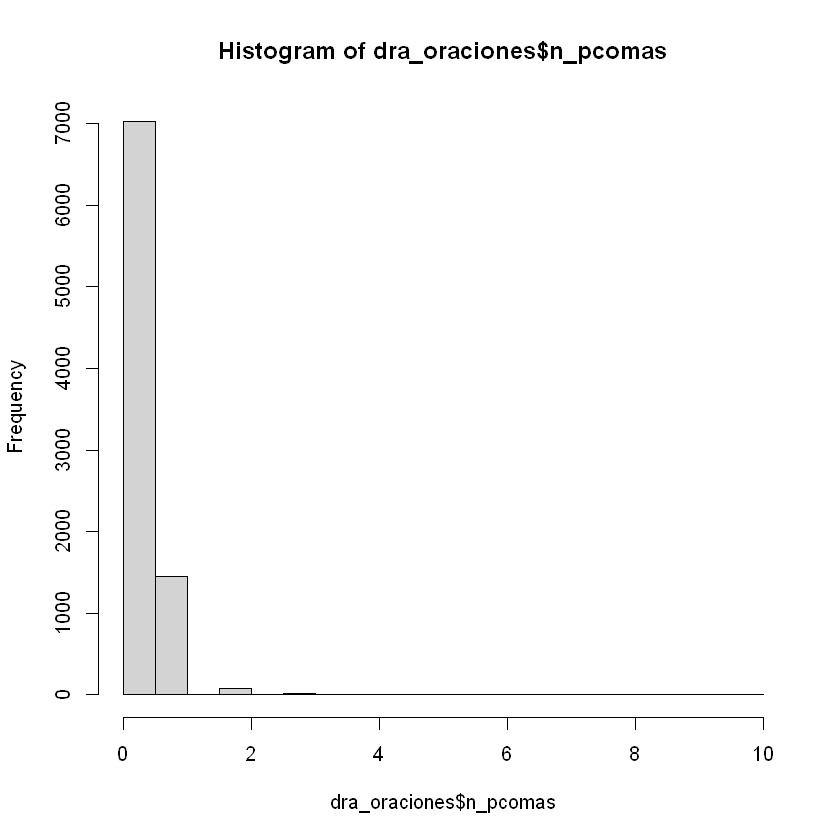

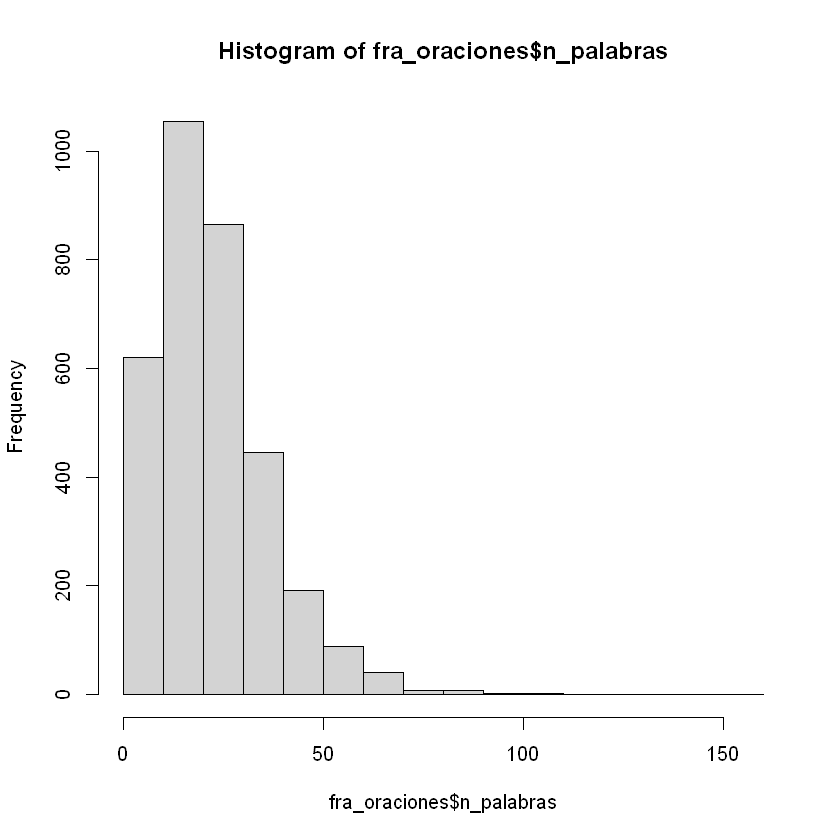

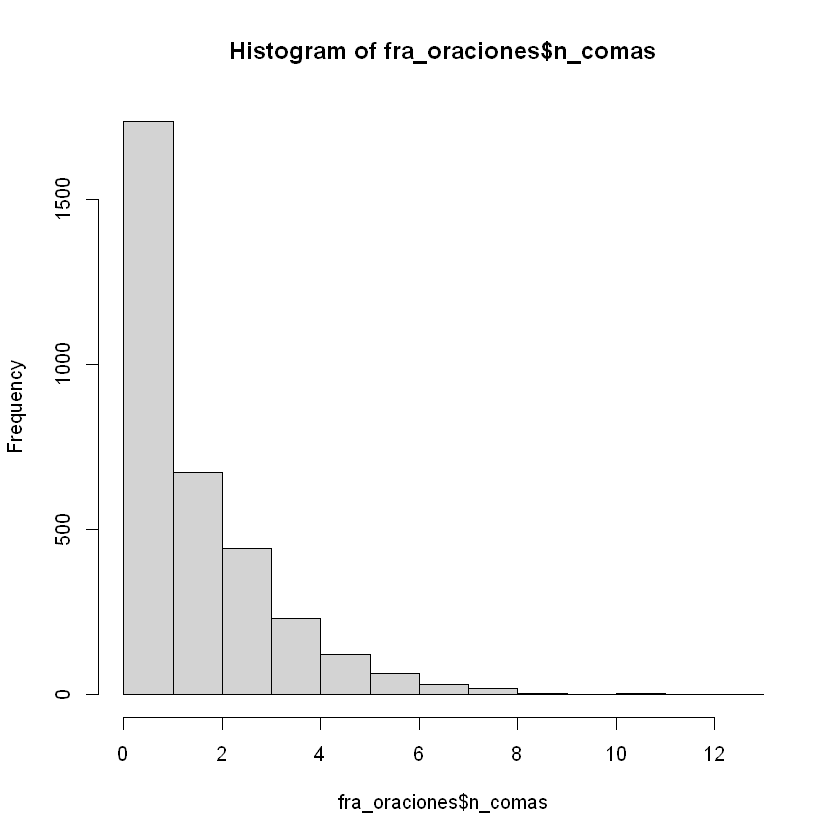

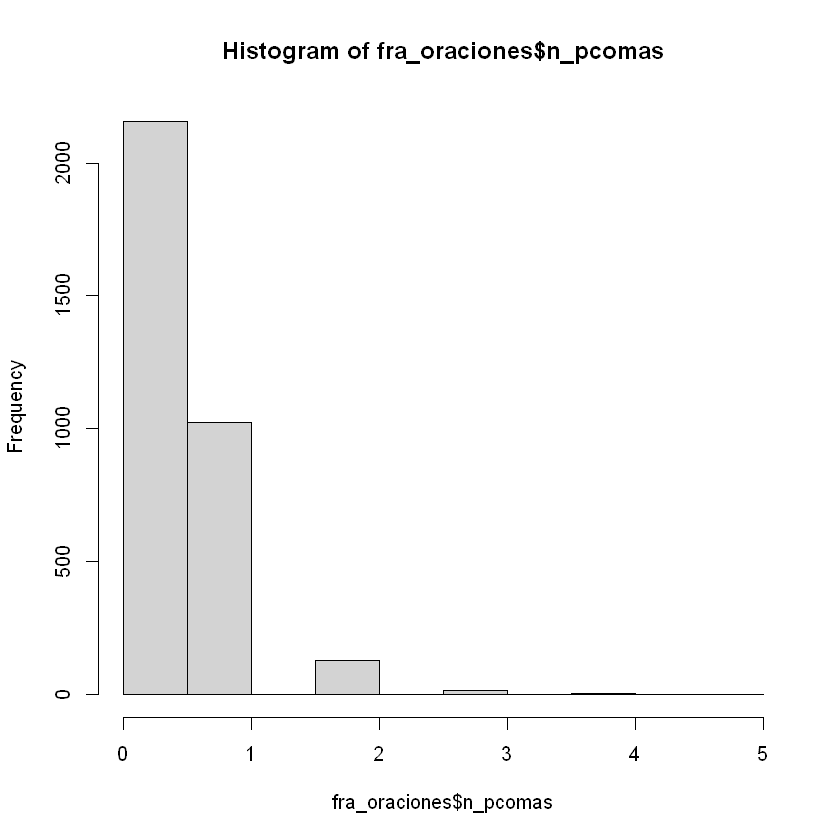

In [16]:
hist(dra_oraciones$n_palabras)
hist(dra_oraciones$n_comas)
hist(dra_oraciones$n_pcomas)

hist(fra_oraciones$n_palabras)
hist(fra_oraciones$n_comas)
hist(fra_oraciones$n_pcomas)

In [81]:
binom_negativa = function(p, k, r){ # Recibe una probabilidad y una cantidad de veces que se desea que se dé un evento y una cantidad de repeticiones del experimento
    resultados = c()
    for(i in 1:r){
        veces = 0
        exitos = 0

        while(TRUE){
            veces = veces + 1
            b = runif(1) < p # Se repite un experimento de Bernoulli
            if (b == TRUE){ # hasta que se cumple el experimento
                exitos = exitos + 1
                if (exitos == k){
                    break
                }
            }
        }
        resultados = c(resultados, veces)
    }
    return (resultados)
}

In [383]:
# https://www.dataanalytics.org.uk/plot-two-overlapping-histograms-on-one-chart-in-r/

a = hist(dra_oraciones$n_palabras, plot = FALSE)
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

repeticiones = 9000
e = 2
p = 0.087
c = hist(binom_negativa(p, e, repeticiones), plot = FALSE, breaks=15)
pdf("palabras.pdf")
plot(a, col = c1, main=NULL, xlab="Palabras por oración o éxitos", ylab="Frecuencia", cex.axis=1.3, cex.lab=1.3) # Plot 1st histogram using a transparent color
plot(c, col = c2, add = T) # Add 2nd histogram using different color
legend(70, 2300, legend=c("Palabras por oración", "Distribución binomial"), col=c('blue', 'red'), cex=1.3, pt.cex=1.5, pch = c(15,15), )
dev.off()

png 
  2

In [206]:
geometrica = function(p, r){ # recibe una probabilidad entre 0 y 1 y un número de repeticiones
    resultados = c()
    for(i in 1:r){
        veces = -1

        while(TRUE){
            veces = veces + 1
            b = runif(1) < p # Se repite un experimento de Bernoulli
            if (b == TRUE){ # hasta que se cumple el experimento
                break
            }
        }
        resultados = c(resultados, veces)
    }
    return (resultados)
}

In [382]:
repeticiones = 10000
p = 0.35
b = hist(dra_oraciones$n_comas, plot = FALSE)
c = hist(geometrica(p, repeticiones), plot = FALSE, breaks=25)

pdf("comas.pdf")
plot(b, col = c1, main=NULL, xlab="Comas por oración o éxitos", ylab="Frecuencia", cex.axis=1.3, cex.lab=1.3) # Plot 1st histogram using a transparent color
plot(c, col = c2, add = T, cex.axis=1.3, cex.lab=1.3) # Add 2nd histogram using different color
legend(8, 5000, legend=c("Palabras por oración", "Distribución geométrica"), col=c('blue', 'red'), cex=1.3, pt.cex=1.5, pch = c(15,15), )
dev.off()

png 
  2